In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import math
import random

# 動態規劃(Dynamic programming)

In [2]:
weight=[70,73,77,80,82,87,90,94,98,106,110,113,115,118,120]
profit=[135,139,149,150,156,163,173,184,192,201,210,214,221,229,240]
capacity=750 #背包重量上限
n=15 #總物品數
array=np.zeros((n+1,capacity+1)) #建立二維陣列
ni,w=1,0 #物品編號/目前重量上限

for ni in range(1,16):
  for w in range(751):
    if(weight[ni-1]>w): #物品重量超過目前重量上限，不放入背包
      array[ni][w]=array[ni-1][w]
    else: #物品重量未超過目前重量上限，放入背包
      if(array[ni-1][w]>array[ni-1][w-weight[ni-1]]+profit[ni-1]): #取收益較大者作為最佳物品組合
        array[ni][w]=array[ni-1][w]
      else:
        array[ni][w]=array[ni-1][w-weight[ni-1]]+profit[ni-1]
print(array)
print('Best Profit=',array[15][750])


[[   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...  135.  135.  135.]
 [   0.    0.    0. ...  274.  274.  274.]
 ...
 [   0.    0.    0. ... 1438. 1439. 1444.]
 [   0.    0.    0. ... 1443. 1446. 1446.]
 [   0.    0.    0. ... 1453. 1458. 1458.]]
Best Profit= 1458.0


# 爬山演算法(Hill climbing, HC)

Best Profit= 1417


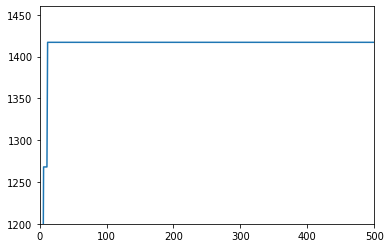

In [42]:
k,kmax=0,500 #迭代次數,迭代次數上限
cur_weight,best_profit,cur_profit=0,0,0
weight=[70,73,77,80,82,87,90,94,98,106,110,113,115,118,120]
profit=[135,139,149,150,156,163,173,184,192,201,210,214,221,229,240]
f_sol=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] #可行解(初始值)
new_sol=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] #待驗證的解
best_sol=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] #此演算法目前找到的最佳解
capacity=750 #背包重量上限
n=15 #總物品數
best_profit_list=[]
k_list=[]

while k<kmax:
  x = random.randint(0,14) #隨機取0-14之間整數
  if((f_sol[x]==0) and (cur_weight+weight[x]<=capacity)): #只要找到更優的解且沒有超重，就放入背包且不再取出
    f_sol[x]=1
    cur_weight=cur_weight+weight[x]
    cur_profit=cur_profit+profit[x]
    best_profit=cur_profit
  k_list.append(k)
  best_profit_list.append(best_profit)
  k=k+1 #迭代次數+1
print('Best Profit=',best_profit)
plt.plot(k_list,best_profit_list)
plt.xlim([0,500])
plt.ylim([1200,1460])
plt.show()

# 模擬退火演算法(Simulated annealing, SA)

Best Profit= 1458


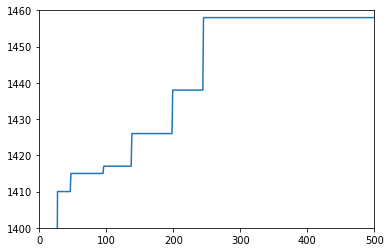

In [36]:
k,kmax=0,500 #迭代次數,迭代次數上限
cur_weight,best_profit,cur_profit=0,0,0
weight=[70,73,77,80,82,87,90,94,98,106,110,113,115,118,120]
profit=[135,139,149,150,156,163,173,184,192,201,210,214,221,229,240]
f_sol=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] #可行解(初始值)
new_sol=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] #待驗證的解
best_sol=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] #此演算法目前找到的最佳解
capacity=750 #背包重量上限
n=15 #總物品數
T=1000 #初始溫度
best_profit_list=[]
k_list=[]

while k<kmax:
  x = random.randint(0,14) #隨機取0-14之間整數
  new_sol=f_sol
  #print('k, new_sol, f_sol,best_sol=',k,new_sol,f_sol,best_sol)
  if(f_sol[x]==0): # 0/1-flip
    new_sol[x]=1
  else:
    new_sol[x]=0
  if((new_sol[x]==0) or (cur_weight+weight[x]<=capacity)): #取出舊物品絕對不會超重or放入新物品後背包沒有超重
    if(new_sol[x]==1): #放入新物品後背包沒有超重
      f_sol=new_sol
      cur_weight=cur_weight+weight[x]
      cur_profit=cur_profit+profit[x]
      if(cur_profit > best_profit): #更新最佳解
        best_profit=cur_profit
        best_sol=f_sol
      else: #不更新最佳解
        noop=0
    else: #取出舊物品絕對不會超重(找到新的解，判斷是否要接受)(是否要跳脫目前的局部解區域)
      r=random.uniform(0,1)
      pr=math.exp(-profit[x]/T)
      if(r<pr): #接受新狀態(取出物品)(跳脫局部解)
        f_sol=new_sol
        cur_weight=cur_weight-weight[x]
        cur_profit=cur_profit-profit[x]
      else: #不接受新狀態(維持原組合)(不跳脫局部解)
        new_sol[x]=1
        f_sol[x]=1
  else:  #放入新物品後超重，取出剛放入的物品
    new_sol[x]=0
    f_sol[x]=0
  k_list.append(k)
  best_profit_list.append(best_profit)
  k=k+1 #迭代次數+1
  T=0.9999*T #模擬降溫過程
  
print('Best Profit=',best_profit)
plt.plot(k_list,best_profit_list,color ='tab:blue')
plt.xlim([0,500])
plt.ylim([1400,1460])
plt.show()

#opt_sol=[1,0,1,0,1,0,1,1,1,0,0,0,0,1,1] #最佳解

# 可行解試算

In [ ]:
test_sol=[1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0]
test_weight=0
test_profit=0
i=0
while i<15:
  test_weight=test_weight+weight[i]*test_sol[i]
  test_profit=test_profit+profit[i]*test_sol[i]
  i=i+1
print('test_weight=',test_weight)
print('test_profit=',test_profit)

test_weight= 631
test_profit= 1203
